In [17]:
# Install Dependencies
from subprocess import call

REQUIREMENTS = [
    "pip",
    
    "addict",
    "tqdm",
    
    "youtube-dl",
    
    "scikit-video"
]

call(["pip", "install", "--quiet", "--no-cache-dir"] + REQUIREMENTS)

0

In [18]:
# imports - standard imports
import os, os.path as osp
import errno
import io
import time

# imports - third-party imports
try:
    from PIL import Image # pillow
except:
    import PIL.Image as Image # PIL

import cv2
import skvideo.io
import numpy as np
from   tqdm    import tqdm
from   addict  import Dict
from   IPython import display

%matplotlib inline

In [19]:
PATH          = Dict()
PATH.BASE     = osp.dirname(".")
PATH.VIDEOS   = osp.join(PATH.BASE, "videos")
PATH.CASCADES = osp.join(PATH.BASE, "cascades") 

URLS          = [
    "https://www.youtube.com/watch?v=aUdKzb4LGJI", # Pedestrian Sample
    "https://www.youtube.com/watch?v=SqauWQWyE5Y", # Traffic Sample
    "https://www.youtube.com/watch?v=wqctLW0Hb_0"  # Traffic Sample
]

In [12]:
# UTILS
def makedirs(dirs, exists_ok = False):
    try:
        os.makedirs(dirs)
    except OSError as e:
        if not exists_ok or e.errno != errno.EEXIST:
            raise

In [20]:
makedirs(PATH.VIDEOS, exists_ok = True)

for url in tqdm(URLS):
    output   = osp.join(PATH.VIDEOS, "%(title)s", "video.%(ext)s")
    print("Downloading YouTube Video %s to %s" % (url, output))
    call(["youtube-dl", "-o", output, url])

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:02<00:04,  2.16s/it]

 67%|██████▋   | 2/3 [00:04<00:02,  2.26s/it]

100%|██████████| 3/3 [00:07<00:00,  2.40s/it]


In [21]:
CASCADE            = Dict()
CASCADE.CAR        = cv2.CascadeClassifier(osp.join(PATH.CASCADES, "car.xml"))
CASCADE.BUS        = cv2.CascadeClassifier(osp.join(PATH.CASCADES, "bus.xml"))
CASCADE.PEDESTRIAN = cv2.CascadeClassifier(osp.join(PATH.CASCADES, "pedestrian.xml"))

In [22]:
videos = os.listdir(PATH.VIDEOS)

for i, name in enumerate(videos):
    print("%s. %s" % (i + 1, name))
    
choice = int(input("Choice: "))

video  = videos[choice - 1]

1. Road_traffic_video_for_object_recognition
2. Pedestrian_overpass_-_original_video_sample_-_BriefCam_Syndex
3. Day_Traffic_Sample_Video_Dataset
Choice: 2


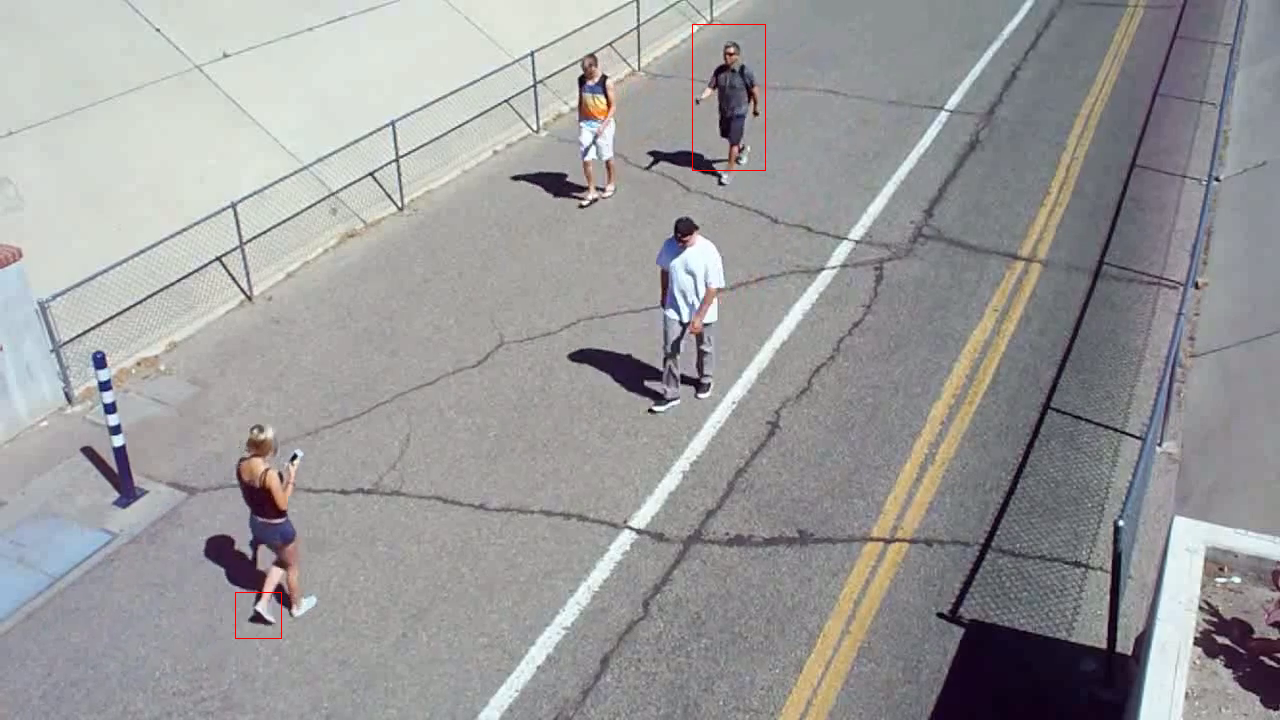

265it [02:11,  2.12it/s]

In [ ]:
cascades = [CASCADE.CAR, CASCADE.BUS, CASCADE.PEDESTRIAN]

path     = osp.join(PATH.VIDEOS, video)
print("Detecting Video: %s" % video)
pvideo   = osp.join(path, "video.mp4")

pframes  = osp.join(path, "frames")
makedirs(pframes, exists_ok = True)

vreader = skvideo.io.vreader(pvideo)

for i, frame in tqdm(enumerate(vreader)):
    image   = Image.fromarray(frame)
    ndarray = np.asarray(image)

    gray    = cv2.cvtColor(ndarray, cv2.COLOR_BGR2GRAY)

    for cascade in cascades:
        boxes = cascade.detectMultiScale(gray)

        for (x, y, w, h) in boxes:
            cv2.rectangle(ndarray, (x, y), (x + w, y + h), (255,0,0), 2)

    image   = Image.fromarray(ndarray)

    bytes_  = io.BytesIO()
    image.save(bytes_, format = "png")

    display.clear_output(wait = True)
    display.display(display.Image(bytes_.getvalue(), format = "png", embed = True))